ANNU,EE21RESCH01010

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
#Functions declaration
    
def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.pinv(X).T@y.T


def polynomial_design_matrix(x, powers, bias=True):
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def with_bias(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))
def poly_matrix(x,M):
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=with_bias(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

In [ ]:
#READING DATAS USING PANDAS 

In [4]:
column_names = ['ID','Outcome','Time', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst', 'Tumor Size', 'Lymph Node Status']

In [7]:
raw_dataset=pd.read_csv('/content/breast_cancerdata.csv',names=column_names,na_values="?",sep=",")
dataset = raw_dataset.copy()

In [ ]:
dataset.head()

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
0,ID number,Out,Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
2,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
3,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
4,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0


In [8]:
#Checking the presence of NA values and dropping them
dataset.isna().sum()

ID                         0
Outcome                    0
Time                       0
Radius Mean                1
Texture Mean               1
Perimeter Mean             1
Area Mean                  1
Smoothness Mean            1
Compactness Mean           1
Concavity Mean             1
Concave Points Mean        1
Symmetry Mean              1
Fractal Dimension Mean     1
Radius SE                  1
Texture SE                 1
Perimeter SE               1
Area SE                    1
Smoothness SE              1
Compactness SE             1
Concavity SE               1
Concave Points SE          1
Symmetry SE                1
Fractal Dimension SE       1
Radius Worst               1
Texture Worst              1
Perimeter Worst            1
Area Worst                 1
Smoothness Worst           1
Compactness Worst          1
Concavity Worst            1
Concave Points Worst       1
Symmetry Worst             1
Fractal Dimension Worst    1
Tumor Size                 1
Lymph Node Sta

In [9]:
dataset=dataset.dropna()

In [11]:
#Selecting the data rows in which disease has recurred

dataset=dataset[dataset['Outcome']=='R']
dataset[dataset['Outcome']=='R']

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
5,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.017560,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
6,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.029870,0.04561,0.013570,0.017740,0.005114,15.51,20.37,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
8,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.014860,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
14,847990,R,36,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.04741,0.010900,0.018570,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
16,848620,R,10,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.025010,0.03188,0.012970,0.016890,0.004142,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0
18,851509,R,10,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.012590,0.01715,0.010380,0.010830,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,4.0,1.0
35,855625,R,9,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.100600,0.09723,0.026380,0.053330,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,2.3,0.0
38,857010,R,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.039940,0.05554,0.016950,0.024280,0.003535,22.82,21.32,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,0.0
40,857438,R,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.010300,0.01603,0.009222,0.010950,0.001629,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,2.5,0.0
41,857637,R,11,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.023060,0.02945,0.015380,0.018520,0.002608,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,3.2,13.0


In [12]:
#Dropping the columns ID and Outcome as they do not add any value to model
dataset = dataset.drop('Outcome', 1)
dataset = dataset.drop('ID', 1)

In [13]:
baseline_dataset = dataset
baseline_dataset = baseline_dataset.drop('Time', axis = 1)

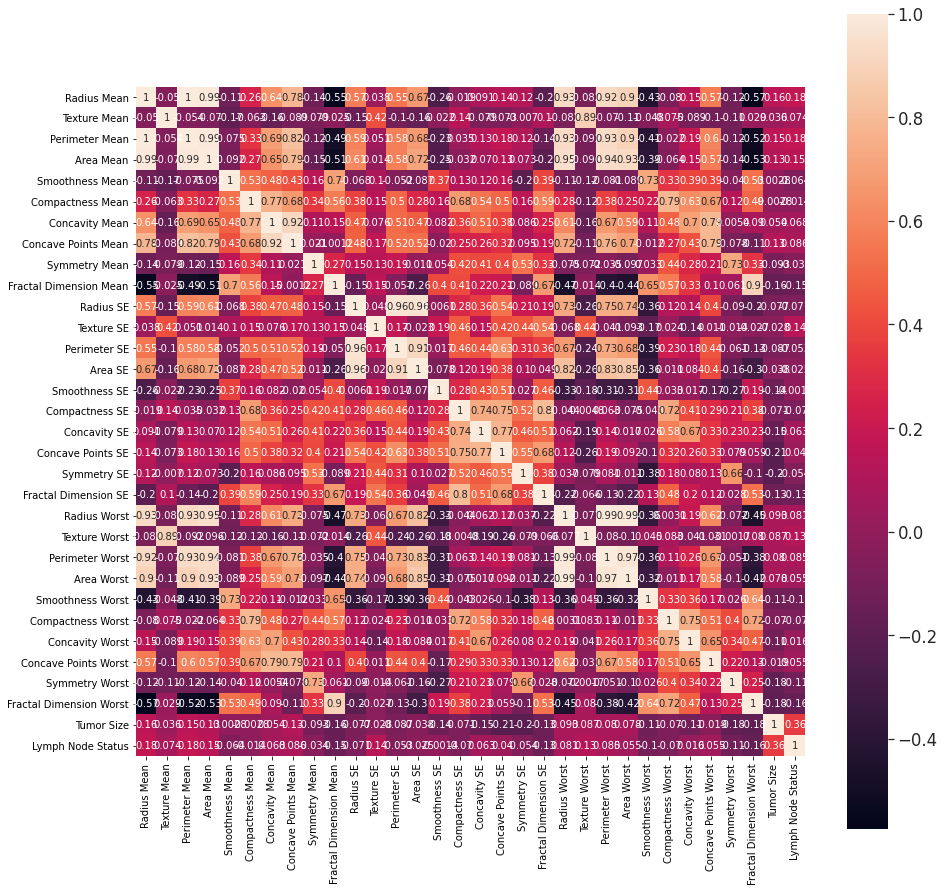

In [14]:
#To check correlation between attributes we can visualize it from heat map
#lighter ones => high correlation
#darker ones => lower correlation
fig = plt.subplots(figsize = (15, 15))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
#Strong correlation is between radius mean and area mean

In [15]:
dataset.describe()  #Descriptive stats for each variable

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,18.330870,21.758913,121.095217,1081.980435,0.103063,0.141606,0.161542,0.093113,0.187848,0.061176,0.667943,1.200233,4.734978,81.965435,0.006477,0.030801,0.038258,0.014383,0.019904,0.003836,22.670435,29.623913,151.332609,1635.767391,0.145341,0.357509,0.440004,0.183985,0.314017,0.088717,3.471739,4.869565
std,3.365566,3.695717,22.910195,397.264721,0.010302,0.040692,0.062138,0.034361,0.021085,0.006298,0.303290,0.426360,2.213389,53.357871,0.001995,0.017501,0.016074,0.003944,0.009174,0.001736,4.703678,5.555203,32.417293,703.147215,0.019605,0.130614,0.147636,0.037977,0.061458,0.016784,2.029851,6.017045
min,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,0.142400,0.050250,0.220800,0.362100,1.602000,18.850000,0.003978,0.008422,0.016030,0.007299,0.009783,0.001526,15.510000,16.670000,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000,0.000000
25%,15.657500,19.067500,103.900000,799.875000,0.094077,0.113375,0.111025,0.067740,0.172175,0.056365,0.427400,0.965225,2.945000,46.805000,0.004739,0.019820,0.023868,0.011505,0.014940,0.002701,19.542500,26.105000,128.300000,1144.250000,0.129775,0.261950,0.323700,0.152850,0.269150,0.076930,2.350000,0.250000
50%,18.825000,21.365000,123.550000,1090.000000,0.103350,0.133350,0.164700,0.088235,0.185750,0.060795,0.625750,1.185500,4.298000,67.700000,0.006293,0.027075,0.037500,0.014595,0.017365,0.003460,21.890000,29.470000,145.700000,1481.000000,0.146800,0.352650,0.404900,0.183400,0.304950,0.086945,3.000000,2.000000
75%,20.262500,24.162500,133.425000,1278.500000,0.111875,0.166000,0.207525,0.108375,0.198900,0.065240,0.826000,1.369250,5.735750,101.142500,0.007717,0.038780,0.046188,0.016833,0.020975,0.004943,24.870000,33.090000,170.850000,1905.500000,0.160725,0.409550,0.533200,0.208500,0.340700,0.100197,4.000000,7.000000
max,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,0.235600,0.074510,1.730000,2.910000,11.560000,316.000000,0.011900,0.100600,0.097230,0.026380,0.053330,0.010390,35.130000,40.140000,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000,27.000000


[[82.0406799 ]
 [-3.08089381]]
92
184
276
368
460
552
644
736
828
920
Minimum error occurs for M = 14 and its values is  130.65155627108646


<Figure size 432x288 with 0 Axes>

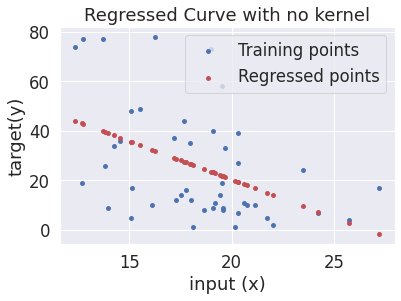

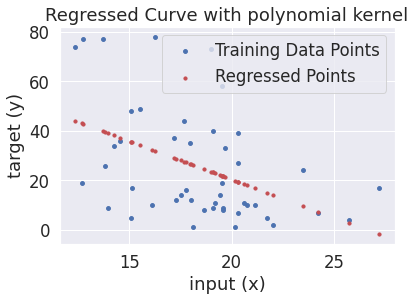

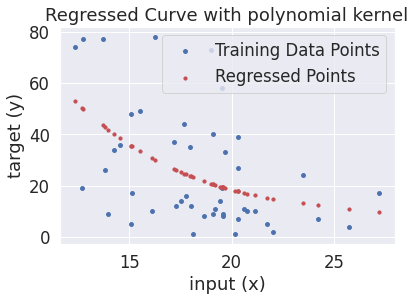

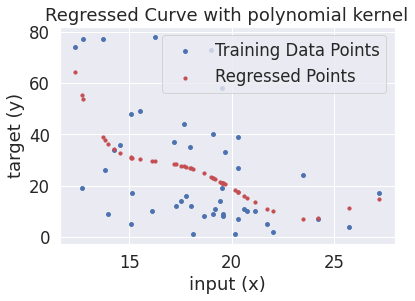

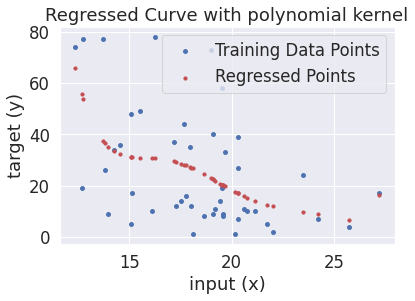

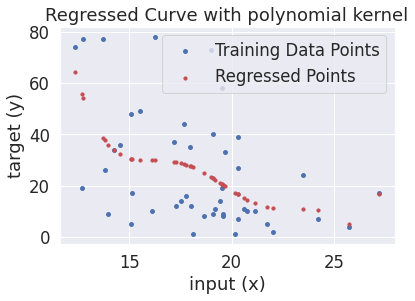

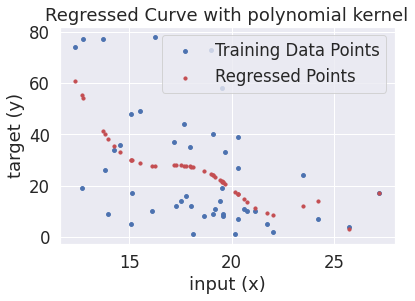

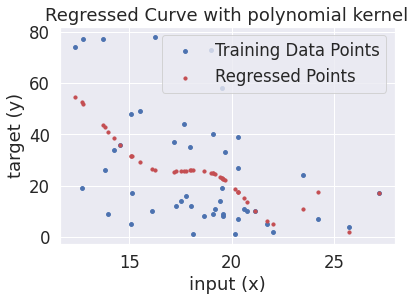

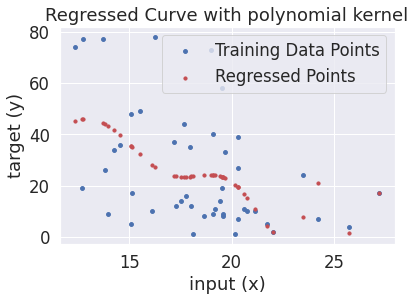

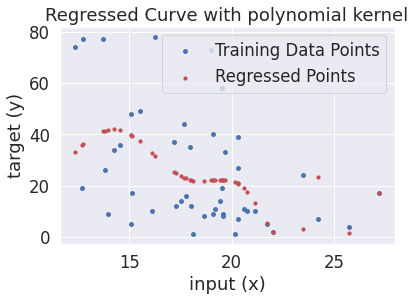

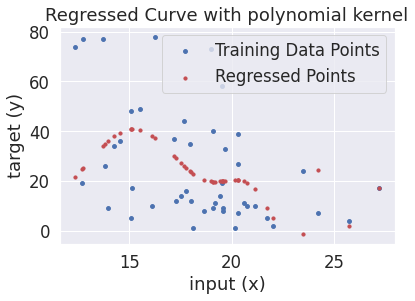

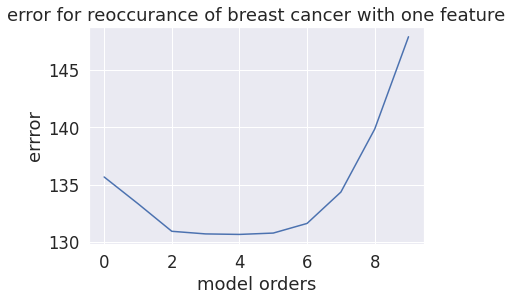

In [18]:
#Trying to estimate time by considering only single highly correlated attribute. for eg radius mean
#One attribute i.e one feature
single_attribute_dataset = dataset[['Radius Mean']]

x=single_attribute_dataset.to_numpy().T
t=dataset[['Time']].to_numpy().T
t=t.astype(np.float)

N=x.shape[1]
X=with_bias(x,N)
weight_vector=closed_form_solution(X,t)
print(weight_vector)

#linear regression (no kernel)
plt.figure()
y=weight_vector.T@X #Prediction
plt.figure()
plt.scatter(x,t,15,label='Training points')
plt.scatter(x,y,15,c='r',label='Regressed points')
plt.xlabel("input (x)")
plt.ylabel("target(y)")
plt.legend()
plt.title("Regressed Curve with no kernel")

#linear regression (polynomial kernel)
M=20
rms=np.array([])
M=20
for m in range(1,M+1,2):
    phi=poly_matrix(x,m)
    print(phi.size)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    rms=np.append(rms,np.sqrt(sum(((y-t)**2).flatten())/(len(y))))


    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_matrix(xpoints,m)
    
    plt.figure()
    plt.scatter(x,t,15,label='Training Data Points')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(x,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve with polynomial kernel")
    plt.grid(True)

#Model order for which error is minimum
m_value=np.argmin(rms)
min_err=rms[m_value]
print("Minimum error occurs for M =",m_value+10,"and its values is ",min_err)
plt.figure()
plt.plot(rms)
plt.xlabel("model orders")
plt.ylabel("errror")
plt.title("error for reoccurance of breast cancer with one feature")
plt.show()

In [19]:
#Multiple Attributes ,from heatmap
drop_list = ['Texture Mean', 'Perimeter Mean', 'Area Mean','Compactness Mean', 'Smoothness Mean', 'Concavity Mean', 'Symmetry Mean',
             'Radius SE','Perimeter SE', 'Area SE', 'Texture SE', 'Compactness SE', 'Smoothness SE', 'Concavity SE', 'Concave Points SE', 'Fractal Dimension SE', 'Symmetry SE',
             'Area Worst','Perimeter Worst','Compactness Worst', 'Concavity Worst', 'Fractal Dimension Worst', 'Symmetry Worst',
             'Concave Points Worst','Texture Worst','Lymph Node Status', 'Tumor Size']
multiple_attribute_dataset = dataset.drop(drop_list,axis = 1 )
multiple_attribute_dataset.head()

,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
5,27,20.29,0.10430,0.05883,22.54,0.1374
6,77,12.75,0.07666,0.07164,15.51,0.1706
8,77,13.71,0.05985,0.07451,17.06,0.1654
14,36,14.54,0.07364,0.07077,17.46,0.1678
16,10,16.13,0.10280,0.07356,20.96,0.1789


In [20]:
#attributes=2
drop_list=['Fractal Dimension Mean','Radius Worst','Smoothness Worst']
two_attribute_dataset=multiple_attribute_dataset.drop(drop_list,axis=1)
two_attribute_dataset.head()

,Time,Radius Mean,Concave Points Mean
5,27,20.29,0.10430
6,77,12.75,0.07666
8,77,13.71,0.05985
14,36,14.54,0.07364
16,10,16.13,0.10280


Minimum error occurs for 2 attributes for M = 5 and its values is  19.09349415572586


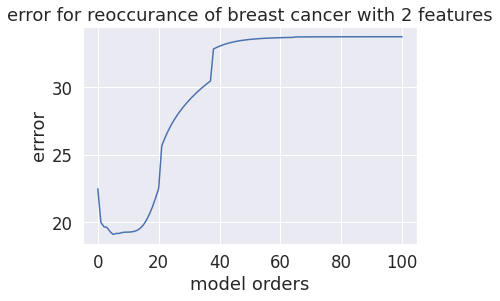

In [21]:
data=two_attribute_dataset.to_numpy()
x=data[:,1:].T
x=x.astype(float)
t=data[:,0].T
t=t.astype(float)

M=100
rms=np.array([])
for m in range(M+1):
    phi=poly_matrix(x,m)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    
    rms=np.append(rms,np.sqrt(sum(((y-t)**2))/(len(y))))

m_value=np.argmin(rms)
min_err=rms[m_value]
print("Minimum error occurs for 2 attributes for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(rms)
plt.xlabel("model orders")
plt.ylabel("errror")
plt.title("error for reoccurance of breast cancer with 2 features")
plt.show()

predicted values without any kernel for 30 features [ 1.28464160e+03  8.73084652e+02 -1.71433810e+02  3.39977303e+01
 -3.07779931e+00  1.05199971e+03 -2.28382095e+02  5.53235788e+02
 -4.14248151e+02  1.17784659e+03 -2.13266270e+03 -1.34364125e+02
  4.71856488e+01  1.93782655e+02 -7.16128281e+00 -1.33642878e+02
  1.00606912e+03 -6.18183590e+02  2.68295160e+01  1.36265942e+02
 -3.59523500e+02 -3.30529610e+02  6.57492650e+01 -1.07366606e+02
  1.62686113e+00  6.55878162e+02 -2.87997471e+02  4.43852553e+02
 -2.70139361e+02  1.66734082e+02 -1.92958042e+01  7.45001827e+00
 -6.95992925e-01  2.27445524e-03  2.25508314e+02  4.66150203e+02
  1.15487321e+02  3.17331703e+01 -4.14880224e+00 -2.72609778e+02
 -9.68685686e+02 -1.30549343e+01 -5.63920237e+00  4.11335673e-02
 -2.01467907e+00  1.13884880e+02 -1.09757229e+02 -4.19161140e+00
  1.34212391e+00 -2.47086971e+00  1.35249356e+01 -2.34427811e+00
  6.40914188e-01 -8.18181245e-04  2.46166886e+02  7.50042556e+02
 -8.98368923e+02  7.92175096e+01 -3.54

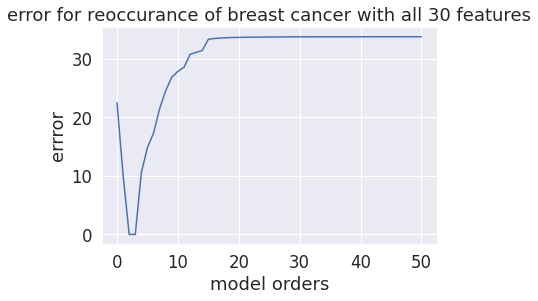

In [23]:
#30 features
#Finally with all 30 features using polynomial kernel
data=dataset.to_numpy()
x=data[:,1:30].T
x=x.astype(float)
t=data[:,0].T
t=t.astype(float)
pred=closed_form_solution(phi,t) #Without any kernel
print("predicted values without any kernel for 30 features",pred)

#With the help of polynomial kernel,linear regression is performed
M=50
rms=np.array([])
for m in range(M+1):
    phi=poly_matrix(x,m)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    
    rms=np.append(rms,np.sqrt(sum(((y-t)**2))/(len(y))))
    
#Final value of model order M for which error is minimum
m_value=np.argmin(rms)
min_err=rms[m_value]
print("Minimum error occurs for 30 features for M =",m_value,"and its values is ",min_err)
y_pred=[]
#BEST FIT FOR M=2
for m in range(2+1):
    phi=poly_matrix(x,m)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    y_pred=np.append(y_pred,y)
print("Predicted values with model order 2 with all 30 features using polynomial regression is:",y_pred)  
plt.figure()
plt.plot(rms)
plt.xlabel("model orders")
plt.ylabel("errror")
plt.title("error for reoccurance of breast cancer with all 30 features")
plt.show()